In [3]:
import sys
'geopandas' in sys.modules

True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import geopandas as gpd
import geoplot as gplt

datafile = "no_na_terms.csv"
no_na_terms = pd.read_csv(datafile)

In [56]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [43]:
sum_states = pd.DataFrame(no_na_terms.groupby('State').sum())
sum_states = sum_states.merge(contiguous_usa, right_on='state', left_on='State')
sum_states = sum_states[['state', 'Illnesses', 'adm1_code', 'population', 'geometry']]
sum_states_gdf = gpd.GeoDataFrame(sum_states)

In [71]:
sum_states_gdf.head()

,state,Illnesses,adm1_code,population,geometry
0,Alabama,66,USA-3541,4779736,"POLYGON ((-85.05441500000001 31.108696, -85.00..."
1,Arizona,125,USA-3520,6392017,"POLYGON ((-109.045225 36.999912, -109.043673 3..."
2,Arkansas,48,USA-3528,2915918,"POLYGON ((-89.662919 36.023073, -89.673513 35...."
3,California,1145,USA-3521,37253956,"POLYGON ((-114.354901 34.464667, -114.165972 3..."
4,Colorado,674,USA-3522,5029196,"POLYGON ((-102.050174 40.000815, -102.040123 3..."


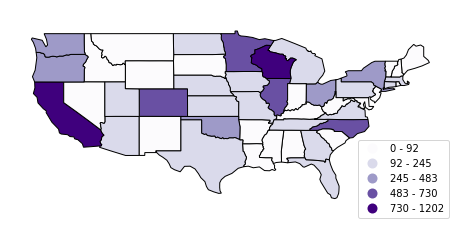

In [70]:
gplt.choropleth(sum_states_gdf, hue=sum_states_gdf['Illnesses'], 
                cmap='Purples', figsize=(8, 8), legend=True, scheme="fisher_jenks")